In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
len(df)

119390

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<Axes: xlabel='hotel,is_canceled'>

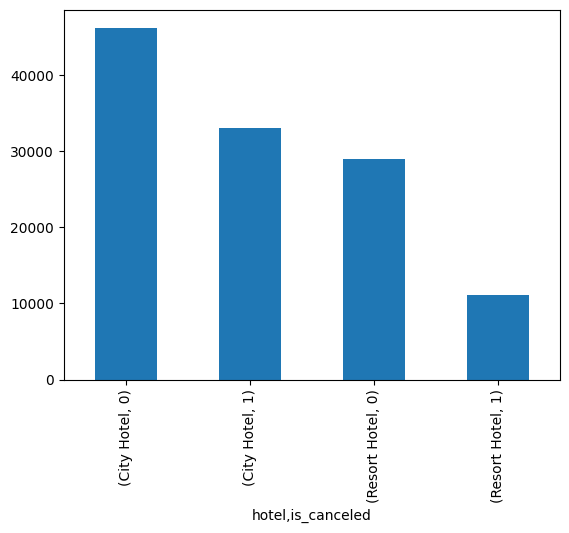

In [7]:
df[['hotel','is_canceled']].value_counts().plot(kind='bar')

In [8]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

BB - Bed and Breakfast: This meal plan typically includes accommodation and breakfast as part of the room rate. Guests are provided with breakfast during their stay.

FB - Full Board: This meal plan includes accommodation as well as three meals a day (breakfast, lunch, and dinner) as part of the room rate. Guests receive all their meals at the hotel.

HB - Half Board: Half Board includes accommodation, breakfast, and one other meal, usually dinner or lunch, as part of the room rate. Guests can choose between breakfast and either lunch or dinner.

SC - Self-Catering: In a Self-Catering arrangement, guests have accommodation but are responsible for their own meals. These hotels typically provide kitchen facilities in the rooms or apartments, allowing guests to cook their own meals.

In [9]:
df['total_of_special_requests'].max()
users_with_5_special_requests = df[df['total_of_special_requests'] == 5]
users_with_5_special_requests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.00,0,5,Canceled,2016-07-22
11125,Resort Hotel,0,108,2017,April,16,21,4,7,2,...,No Deposit,NaN,NaN,0,Transient,85.00,0,5,Check-Out,2017-05-02
14596,Resort Hotel,0,22,2015,July,28,9,0,3,3,...,No Deposit,NaN,NaN,0,Transient-Party,180.67,1,5,Check-Out,2015-07-12
14921,Resort Hotel,0,185,2017,February,8,24,2,2,1,...,No Deposit,NaN,NaN,0,Transient,39.60,0,5,Check-Out,2017-02-28
14922,Resort Hotel,0,134,2017,April,15,13,0,3,1,...,No Deposit,NaN,NaN,0,Transient,61.50,0,5,Check-Out,2017-04-16
24630,Resort Hotel,0,76,2016,May,21,20,2,5,2,...,No Deposit,240.0,NaN,0,Transient-Party,127.14,0,5,Check-Out,2016-05-27
27288,Resort Hotel,0,210,2016,August,33,12,4,10,2,...,No Deposit,2.0,NaN,0,Contract,106.55,0,5,Check-Out,2016-08-26
27477,Resort Hotel,0,3,2016,August,35,24,2,5,2,...,No Deposit,240.0,NaN,0,Transient,198.86,0,5,Check-Out,2016-08-31
29906,Resort Hotel,0,47,2016,November,45,5,2,2,2,...,No Deposit,240.0,NaN,0,Transient,74.80,0,5,Check-Out,2016-11-09
29949,Resort Hotel,0,24,2017,March,13,29,0,2,2,...,No Deposit,250.0,NaN,0,Group,63.00,0,5,Check-Out,2017-03-31


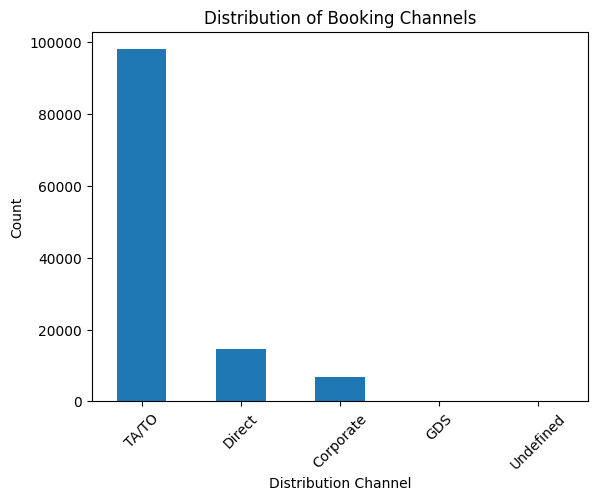

In [10]:
booking_channel_counts = df['distribution_channel'].value_counts()
booking_channel_counts.plot(kind='bar', rot=45)
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Distribution of Booking Channels')
plt.show()

In [11]:
cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 37.04%


## Data preparation

**Hypot**:
Can we predict if people are going to cancel their hotel reservation?

In [12]:
missing_values = df.isnull().sum()

print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df['has_company'] = df['company'].notnull()
df.drop(columns=['company'], inplace=True)

In [14]:
df.dropna(subset=['country'], inplace=True)

In [15]:
df.drop(columns=['agent'], inplace=True)

(I was having 100% accuracy before finding this comment lol)

Husnain Ali Official
Posted 16 days ago

· Posted on Version 1 of 1

The reservation_status and is_canceled are duplicate columns thats why your accuracy is 100% recheck your data
one is numeric the other one is catagory

In [16]:
df.drop(columns=['reservation_status'], inplace=True)

In [17]:
df.dropna(subset=['children'], inplace=True)

In [18]:
missing_values = df.isnull().sum()

print(missing_values)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Half of the data does not have a company so going to assume they are not travelling for business, making a new column has_company and dropping the old column, missing 500 countries decided to drop them as we have enough data to afford this and i don't want to pollute. missing a bunch of values for the agent id but that should not matter for what im trying to deduct, dropped the whole column

## Data splitting

In [20]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)

train, temp = train_test_split(df, test_size=0.3, random_state=42)

validate, test = train_test_split(temp, test_size=0.5, random_state=42)

print(f"Training set size: {train.shape[0]} samples")
print(f"Validation set size: {validate.shape[0]} samples")
print(f"Test set size: {test.shape[0]} samples")

Training set size: 83228 samples
Validation set size: 17835 samples
Test set size: 17835 samples


## Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

y_train = train['is_canceled']
X_train = train.drop('is_canceled', axis=1) 


model = RandomForestClassifier(n_estimators=145, max_depth=24, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=24, n_estimators=145, random_state=1)

## Accuracy

In [22]:
from sklearn.metrics import accuracy_score

X_validation = validate.drop('is_canceled', axis=1) 
y_validation = validate['is_canceled']

y_pred = model.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)  
print(f"Accuracy: {accuracy}")

Accuracy: 0.8459770114942529


## AUC ROC

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_validation, y_pred)
print(f"AUC-ROC Score: {roc_auc}")

AUC-ROC Score: 0.8025472468069349


## Hyperparameter tuning

In [25]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 5, 30)

    model_optimize = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    model_optimize.fit(X_train, y_train) 

    pred = model_optimize.predict(X_validation) 
    auc_roc = roc_auc_score(y_validation, pred)

    return auc_roc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5) 

best_params = study.best_params
best_auc_roc = study.best_value

print(f"Best Hyperparameters: {best_params}")
print(f"Best AUC-ROC Score: {best_auc_roc}")

c:\Programming\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-10-01 18:08:03,287] A new study created in memory with name: no-name-639be000-0cd6-456e-bff3-eed3078ff0d9
[I 2023-10-01 18:08:30,404] Trial 0 finished with value: 0.668446382914724 and parameters: {'n_estimators': 173, 'max_depth': 6}. Best is trial 0 with value: 0.668446382914724.
[I 2023-10-01 18:09:29,042] Trial 1 finished with value: 0.8248803903919497 and parameters: {'n_estimators': 75, 'max_depth': 30}. Best is trial 1 with value: 0.8248803903919497.
[I 2023-10-01 18:09:44,417] Trial 2 finished with value: 0.6667167995187246 and parameters: {'n_estimators': 106, 'max_depth': 5}. Best is trial 1 with value: 0.8248803903919497.
[I 2023-10-01 18:09:57,278] Trial 3 finished with value: 0.6766289060431743 and parameters: {'n_estimat

Best Hyperparameters: {'n_estimators': 75, 'max_depth': 30}
Best AUC-ROC Score: 0.8248803903919497


## Test set

In [26]:
X_test = test.drop('is_canceled', axis=1) 
y_test = test['is_canceled']

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy}")

Accuracy: 0.8507429212223157
